## Word University Rank - 2020

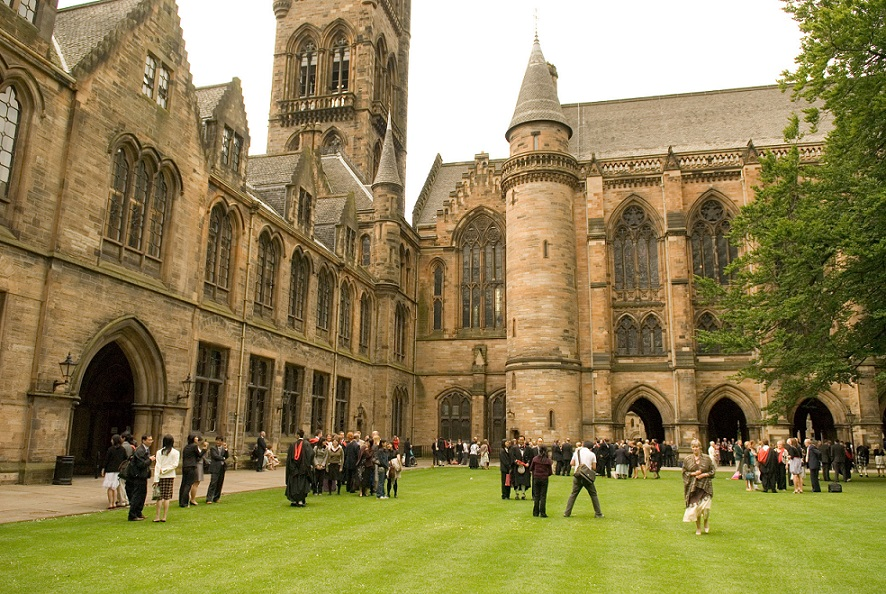

_**The studenthood is a golden period of my life.**<br> Uzbek proverb_

https://www.kaggle.com/joeshamen/world-university-rankings-2020

The datasets consist of the following columns:
 
* Rank_Char: ranking according to The Times Higher Education (varchar)
* ScoreRank: ranking according to the column "Score_Result" (number)
* University: name of the university.
* Country: country of the university.
* Number_students: number of students.
* Numbstudentsper_Staff: the ratio between the number of students and the staff.
* International_Students: percentage of international students.
* Percentage_Female: percentage of women.
* Percentage_Male: percentage of men.
* Teaching: score in teaching.
* Research: score in research.
* ScoreResult: resulting score: (30% teaching, 30% research, 30% citations, 7.5% international outlook, 2.5% Industry_Income). This variable has been calculated according to the aforementioned weights.
* Overall_Ranking. Ranking according to The Times Higher Education (varchar)

### Importing necessary libraries and loading data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette("pastel")
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Word_University_Rank_2020-1.csv")

In [2]:
df.head()

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
0,1,1,University of Oxford,United Kingdom,"20,664",11.2,41%,46%,54%,90.5,99.6,98.4,65.5,96.4,95.4,95.40
1,2,2,California Institute of Technology,United States,"2,24",6.4,30%,34%,66%,92.1,97.2,97.9,88.0,82.5,94.5,94.50
2,3,3,University of Cambridge,United Kingdom,"18,978",10.9,37%,47%,53%,91.4,98.7,95.8,59.3,95.0,94.4,94.40
3,4,4,Stanford University,United States,"16,135",7.3,23%,43%,57%,92.8,96.4,99.9,66.2,79.5,94.3,94.30
4,5,5,Massachusetts Institute of Technology,United States,"11,247",8.6,34%,39%,61%,90.5,92.4,99.5,86.9,89.0,93.6,93.60


In [3]:
df.tail()

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
1391,1001+,531,Cear State University,Brazil,"20,174",17.8,0%,55%,45%,16.2,8.3,6.1,35.6,16.3,11.3,10.7-22.1
1392,1001+,532,Pontifical Catholic University of Minas Gerais,Brazil,"34,101",21.3,0%,57%,43%,15.3,7.7,6.7,35.1,19.4,11.2,10.7-22.1
1393,1001+,533,Bashkir State University,Russian Federation,"15,236",11.1,3%,63%,37%,17.0,8.1,4.5,36.9,16.7,11.1,10.7-22.1
1394,1001+,534,University of Caxias do Sul,Brazil,"17,101",24.9,0%,54%,46%,13.8,7.8,7.6,35.0,17.7,11.0,10.7-22.1
1395,1001+,535,Tokyo Denki University,Japan,"9,285",25.6,2%,12%,88%,15.2,9.3,3.4,39.6,17.7,10.7,10.7-22.1


### Data Pre-processing

In [4]:
df.columns

Index(['Rank_Char', 'Score_Rank', 'University', 'Country', 'Number_students',
       'Numb_students_per_Staff', 'International_Students',
       'Percentage_Female', 'Percentage_Male', 'Teaching', 'Research',
       'Citations', 'Industry_Income', 'International_Outlook', 'Score_Result',
       'Overall_Ranking'],
      dtype='object')

In [5]:
df.shape

(1396, 16)

Total record in dataset = 1396<br>  Columns in the dataset = 16

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank_Char                1396 non-null   object 
 1   Score_Rank               1396 non-null   int64  
 2   University               1396 non-null   object 
 3   Country                  1396 non-null   object 
 4   Number_students          1396 non-null   object 
 5   Numb_students_per_Staff  1396 non-null   float64
 6   International_Students   1396 non-null   object 
 7   Percentage_Female        1396 non-null   object 
 8   Percentage_Male          1396 non-null   object 
 9   Teaching                 1396 non-null   float64
 10  Research                 1396 non-null   float64
 11  Citations                1396 non-null   float64
 12  Industry_Income          1396 non-null   float64
 13  International_Outlook    1396 non-null   float64
 14  Score_Result            

In [7]:
df['International_Students'] = df['International_Students'].str.replace('%', '')
df['Percentage_Female'] = df['Percentage_Female'].str.replace('%', '')
df['Percentage_Male'] = df['Percentage_Male'].str.replace('%', '')

In [8]:
df.Number_students = df.Number_students.str.replace(',', '').astype(int)

In [9]:
cols = ['International_Students', 'Percentage_Female', 'Percentage_Male']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank_Char                1396 non-null   object 
 1   Score_Rank               1396 non-null   int64  
 2   University               1396 non-null   object 
 3   Country                  1396 non-null   object 
 4   Number_students          1396 non-null   int32  
 5   Numb_students_per_Staff  1396 non-null   float64
 6   International_Students   1394 non-null   float64
 7   Percentage_Female        1396 non-null   int64  
 8   Percentage_Male          1396 non-null   int64  
 9   Teaching                 1396 non-null   float64
 10  Research                 1396 non-null   float64
 11  Citations                1396 non-null   float64
 12  Industry_Income          1396 non-null   float64
 13  International_Outlook    1396 non-null   float64
 14  Score_Result            

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Rank_Char                  0
Score_Rank                 0
University                 0
Country                    0
Number_students            0
Numb_students_per_Staff    0
International_Students     2
Percentage_Female          0
Percentage_Male            0
Teaching                   0
Research                   0
Citations                  0
Industry_Income            0
International_Outlook      0
Score_Result               0
Overall_Ranking            0
dtype: int64

None of the columns have NaN values, except International_students (2 missing values only). There are no duplicated values. I made some technical changes: removed the percentage signs from the columns 'International_Students', 'Percentage_Female' and 'Percentage_Male', changed their dtypes.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Score_Rank,1396.0,315.304441,140.946223,1.0,212.000,336.00,437.000,535.0
Number_students,1396.0,21806.686963,32750.006484,11.0,8169.500,16167.50,28235.500,830104.0
Numb_students_per_Staff,1396.0,18.966905,16.835492,0.9,12.375,16.35,21.900,493.5
International_Students,1394.0,11.364419,11.775322,0.0,2.000,8.00,17.000,83.0
Percentage_Female,1396.0,47.527937,16.051617,0.0,41.000,52.00,57.000,100.0
Percentage_Male,1396.0,47.744269,16.083467,0.0,41.000,47.00,56.000,100.0
Teaching,1396.0,28.229083,14.149550,11.2,18.300,23.80,33.600,92.8
Research,1396.0,23.981160,17.537044,6.8,11.600,18.00,30.100,99.6
Citations,1396.0,48.113109,27.735626,1.7,23.375,45.65,71.950,100.0
Industry_Income,1396.0,46.477292,16.273498,34.4,35.775,39.40,49.825,100.0


The summary statistics of dataset.

### Univariate Analysis

**Ranked by The Times Higher Education**

In [14]:
pd.DataFrame(df.Rank_Char.value_counts().head(10))

,Rank_Char
1001+,395
601-800,202
801-1000,198
501-600,100
401-500,100
351-400,51
251-300,51
301-350,49
201-250,48
157,6


28.3% of universities in the dataset have a rating 1000+.

**Countries**

In [15]:
df['University'].count()

1396

In [16]:
df['Country'].nunique()

92

In [17]:
pd.DataFrame(df.groupby('Country')['University'].count().nlargest(20))

,University
Country,
United States,172
Japan,110
United Kingdom,100
China,81
India,56
Germany,48
Brazil,46
Italy,45
Spain,45


List of Top 20 countries. In our dataset, 1396 universities are located in 92 countries around the world.

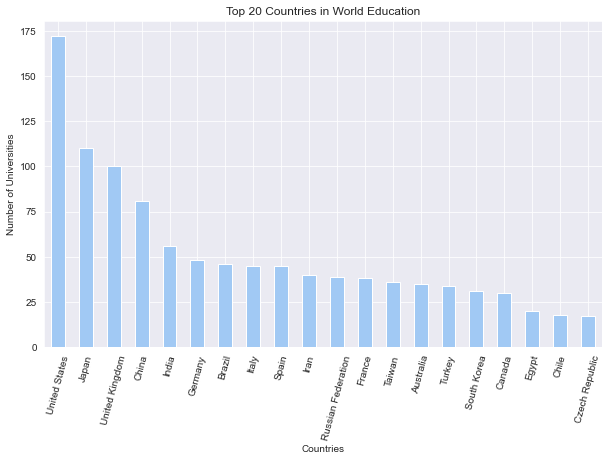

In [18]:
df.groupby('Country')['University'].count().nlargest(20).plot(ylim=0, kind = "bar", figsize = (10, 6))
plt.title("Top 20 Countries in World Education")
plt.xlabel("Countries")
plt.ylabel("Number of Universities")
plt.xticks(rotation=75);

In [19]:
pd.DataFrame(df[:10]['Country'].value_counts())

,Country
United States,7
United Kingdom,3


7 US universities and 3 UK universities in the Top 10! This confirms that these 2 countries are world leaders in education. _(In terms of the number of universities, Japan (110) is ahead of UK (100), but there are more UK universities at the top of the ranking.)_

In [20]:
pd.DataFrame(df[:100]['Country'].value_counts())

,Country
United States,40
United Kingdom,11
Germany,8
Netherlands,7
Australia,6
Canada,5
Switzerland,4
China,3
Hong Kong,3
France,3


Top 100 universities by country. Here the US and UK occupy 51% of the total.

### Numerical features

In [21]:
def plot_uni(d):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--', linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g', linestyle='solid', linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [22]:
num_cols = ['Number_students', 'Numb_students_per_Staff', 'International_Students', 'Percentage_Female', 'Percentage_Male', 'Teaching', 'Research', 'Citations', 'Industry_Income', 'International_Outlook', 'Score_Result']

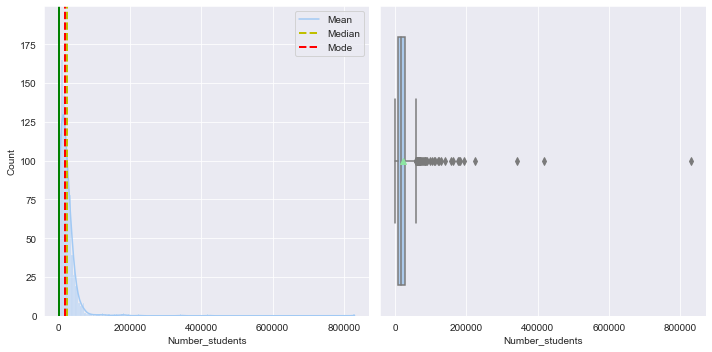

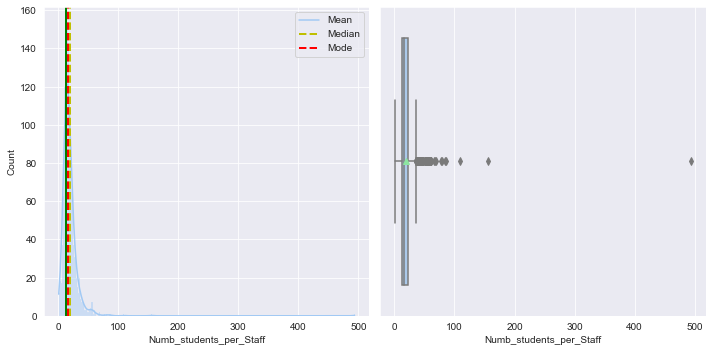

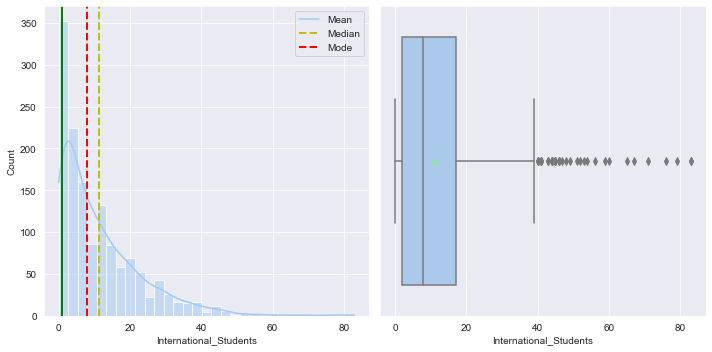

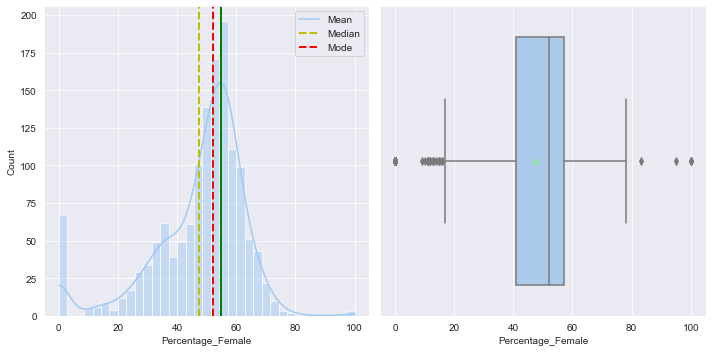

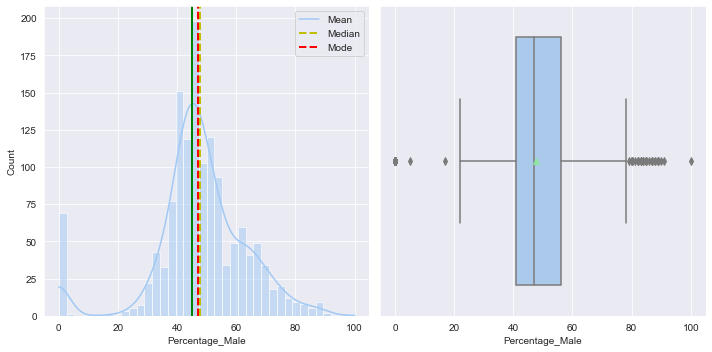

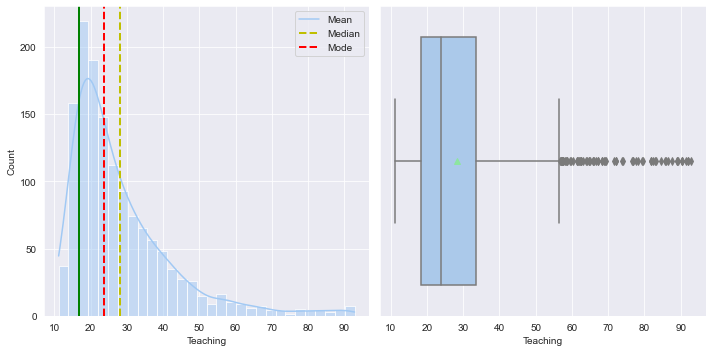

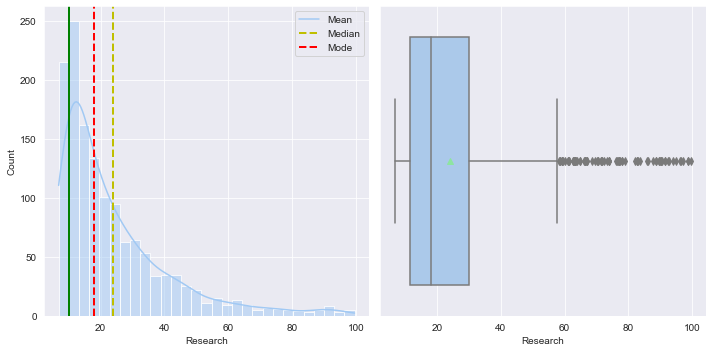

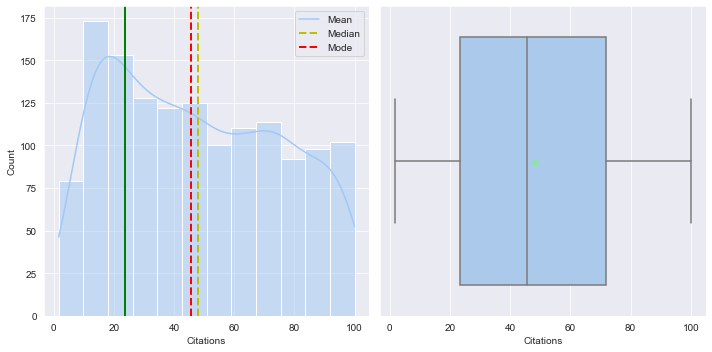

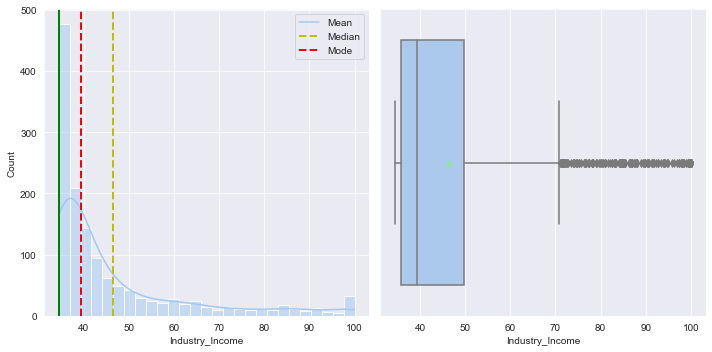

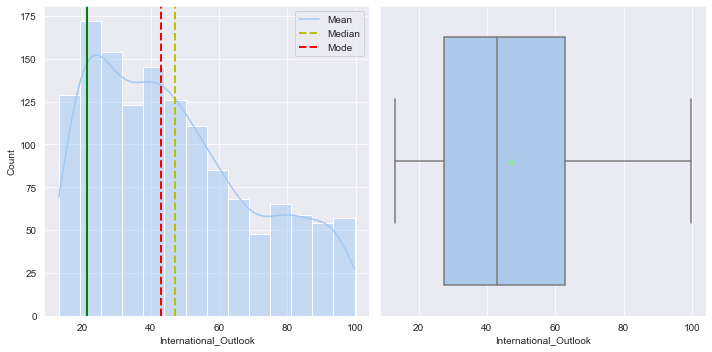

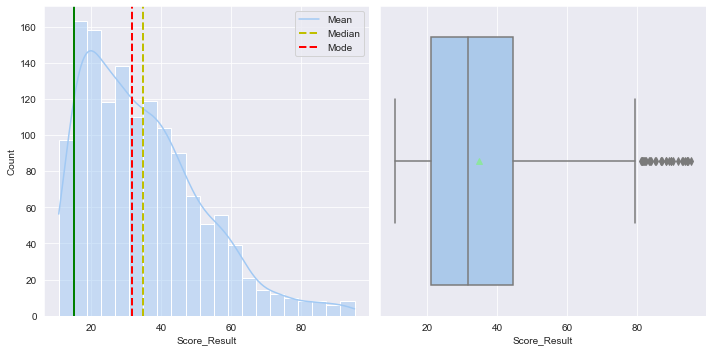

In [23]:
for f in num_cols:
    plot_uni(df[f])

**Number_students**
<br>
There are several outliers (higher end).<br> The average number of students is about 22,000.


**Numb_students_per_Staff**
<br>
There are several outliers (higher end).<br> Most universities (75%) have about 22 students per staff.


**International_Students**
<br>
International_Students skewed to the right. There are several outliers (higher end).<br> The maximum number of international students is 83%.


**Percentage_Female**
<br>
There are multiple outliers (both ends).<br> The average number of girls is 47% - almost half of all students, that is, we can talk about gender equality.


**Percentage_Male**
<br>
The same can be said about the number of young men, they are also an average of 48% - almost half of all students.<br> There are multiple outliers (both ends).


**Education**
<br>
Teaching is skewed to the right.<br> The maximum score for training is 92.8. But the average score is about 30.


**Research**
<br>
The study score is skewed to the right.<br> There are several outliers (higher end). There is a large gap between the maximum (99.6) and minimum (6.8) scores.


**Citations**
<br>
The average citation score of 48 is much higher than the teaching and research scores.


**Score_Result**
<br>
The evaluation result is skewed to the right.<br> There are several outliers (higher end).

### Multivariate analysis

**Let's analyze the features of the Top 100 Universities. I hope this will help us better understand what criteria play a big role in success in the field of education.**

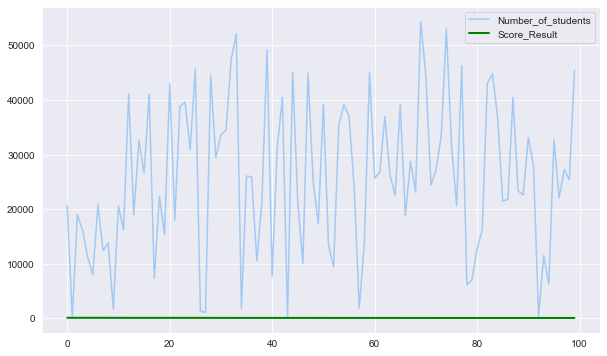

In [24]:
plt.figure(figsize=(10,6))

Number_of_students = df[:100]['Number_students']
plt.plot(Number_of_students)

Score_Result = df[:100]['Score_Result']
plt.plot(Score_Result, lw=2, c='g')

plt.legend(['Number_of_students', 'Score_Result']);

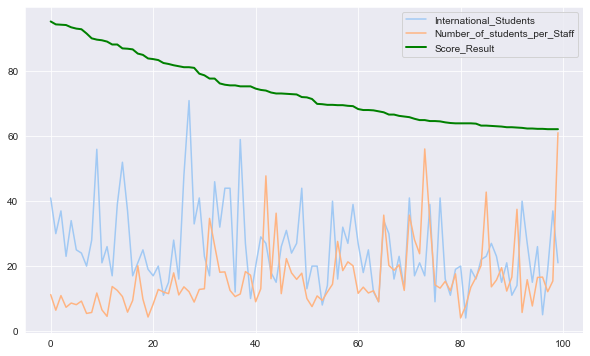

In [25]:
plt.figure(figsize=(10, 6))

International_Students = df[:100]['International_Students']
plt.plot(International_Students)

Number_of_students_per_Staff = df[:100]['Numb_students_per_Staff']
plt.plot(Number_of_students_per_Staff)

Score_Result = df[:100]['Score_Result']
plt.plot(Score_Result, lw=2, c='g')

plt.legend(['International_Students', 'Number_of_students_per_Staff', 'Score_Result']);

The two graphs above show that "Score_Result" is independent of "Number_students", "Numb_students_per_Staff", "International_Students". Accordingly, the percentage of females and males also does not affect the final result.

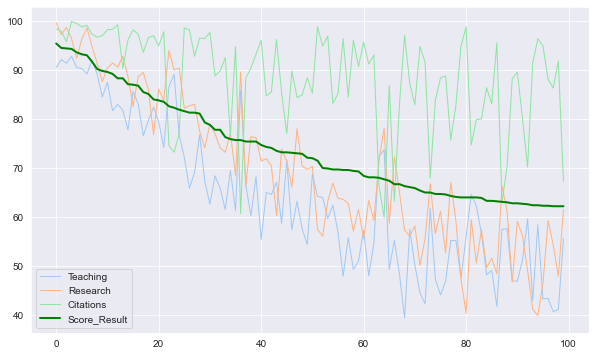

In [26]:
plt.figure(figsize=(10, 6))

Teaching = df[:100]['Teaching']
plt.plot(Teaching, lw=1)

Research = df[:100]['Research']
plt.plot(Research, lw=1)

Citations = df[:100]['Citations']
plt.plot(Citations, lw=1)

Score_Result = df[:100]['Score_Result']
plt.plot(Score_Result, lw=2, c='g')

plt.legend(['Teaching', 'Research', 'Citations', 'Score_Result']);

Now we have found out what success in the field of education depends on. High scores in 'Teaching', 'Research', 'Citation' are directly related to a high score in the ranking. In particular, the 'Research' has the greatest influence on the final ranking of universities.

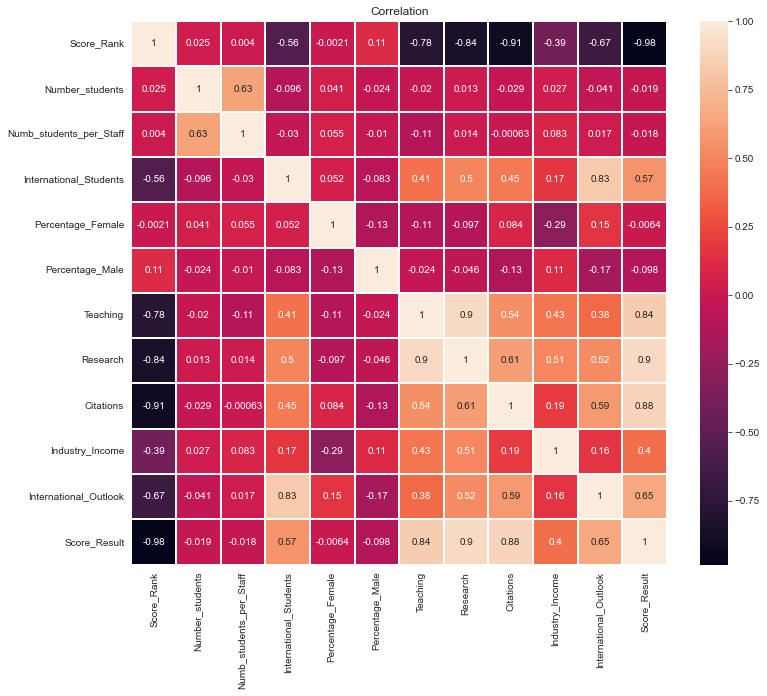

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=df.corr(), annot=True, linewidths=0.2, linecolor='white')
plt.title("Correlation");

As analysis of the dataset shows, 'International_Students' (0.57) and 'International_Outlook' (0.65) have a strong correlation with the final result. But 'Research' (0.9), 'Teaching' (0.84) and 'Citation' (0.88) are the most correlated with 'Score_Result'<br> **I am pleased to know that applicants are most interested in high academic achievements and the competitive quality of teaching in educational institutions.**  

Note: This data analysis case will be subjected to further updates.